data source: hospitalization: https://github.com/wzmli/COVID19-Canada/blob/master/COVID19_Canada.csv  
Cases,resolve,death: https://covid-19.ontario.ca/data

### Read Data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

In [100]:
# Importing Training Set
dataset_train = pd.read_csv('ontario multiv.csv')
dataset_train.rename(columns = {'category':'date'}, inplace = True)
dataset_train.date = pd.to_datetime(dataset_train.date)
dataset_train['date'] = dataset_train['date'].dt.date

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:5]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['date'])
#datelist_train = [date.strptime('%Y/%m/%d') for date in datelist_train]
#datelist_train = [dt.datetime.strptime(date,'%Y/%m/%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (156, 5)
All timestamps == 156
Featured selected: ['Cases', 'Death', 'Hosp', 'Resolve']


In [101]:
datelist_train

[datetime.date(2020, 3, 19),
 datetime.date(2020, 3, 20),
 datetime.date(2020, 3, 21),
 datetime.date(2020, 3, 22),
 datetime.date(2020, 3, 23),
 datetime.date(2020, 3, 24),
 datetime.date(2020, 3, 25),
 datetime.date(2020, 3, 26),
 datetime.date(2020, 3, 27),
 datetime.date(2020, 3, 28),
 datetime.date(2020, 3, 29),
 datetime.date(2020, 3, 30),
 datetime.date(2020, 3, 31),
 datetime.date(2020, 4, 1),
 datetime.date(2020, 4, 2),
 datetime.date(2020, 4, 3),
 datetime.date(2020, 4, 4),
 datetime.date(2020, 4, 5),
 datetime.date(2020, 4, 6),
 datetime.date(2020, 4, 7),
 datetime.date(2020, 4, 8),
 datetime.date(2020, 4, 9),
 datetime.date(2020, 4, 10),
 datetime.date(2020, 4, 11),
 datetime.date(2020, 4, 12),
 datetime.date(2020, 4, 13),
 datetime.date(2020, 4, 14),
 datetime.date(2020, 4, 15),
 datetime.date(2020, 4, 16),
 datetime.date(2020, 4, 17),
 datetime.date(2020, 4, 18),
 datetime.date(2020, 4, 19),
 datetime.date(2020, 4, 20),
 datetime.date(2020, 4, 21),
 datetime.date(2020, 4,

In [102]:
dataset_train

,date,Cases,Death,Hosp,Resolve
0,2020-03-19,44,1,22,0
1,2020-03-20,60,0,23,0
2,2020-03-21,59,0,31,1
3,2020-03-22,48,3,31,2
4,2020-03-23,78,1,39,0
...,...,...,...,...,...
151,2020-08-17,99,0,32,83
152,2020-08-18,125,4,41,90
153,2020-08-19,102,0,42,89
154,2020-08-20,76,1,35,76


### Data Preprocessing 

In [103]:
dataset_train = dataset_train[cols].astype(str)
dataset_train = dataset_train.astype(float)
# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (156, 4).


array([[4.400e+01, 1.000e+00, 2.200e+01, 0.000e+00],
       [6.000e+01, 0.000e+00, 2.300e+01, 0.000e+00],
       [5.900e+01, 0.000e+00, 3.100e+01, 1.000e+00],
       [4.800e+01, 3.000e+00, 3.100e+01, 2.000e+00],
       [7.800e+01, 1.000e+00, 3.900e+01, 0.000e+00],
       [8.500e+01, 2.000e+00, 5.000e+01, 0.000e+00],
       [1.000e+02, 5.000e+00, 4.000e+01, 0.000e+00],
       [1.700e+02, 2.000e+00, 8.000e+01, 0.000e+00],
       [1.350e+02, 3.000e+00, 6.000e+01, 0.000e+00],
       [1.510e+02, 1.000e+00, 1.000e+02, 0.000e+00],
       [2.110e+02, 4.000e+00, 1.600e+02, 0.000e+00],
       [3.510e+02, 0.000e+00, 2.500e+02, 4.230e+02],
       [2.600e+02, 1.000e+01, 2.910e+02, 1.030e+02],
       [4.260e+02, 4.000e+00, 3.320e+02, 1.400e+02],
       [4.010e+02, 1.600e+01, 4.050e+02, 1.570e+02],
       [4.620e+02, 1.400e+01, 4.620e+02, 1.920e+02],
       [3.750e+02, 2.700e+01, 5.060e+02, 1.960e+02],
       [4.080e+02, 2.500e+01, 5.230e+02, 2.300e+02],
       [3.090e+02, 1.300e+01, 5.890e+02, 1.750

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.40456224],
       [-1.30175625],
       [-1.30818162],
       [-1.37886074],
       [-1.1860995 ],
       [-1.14112187],
       [-1.04474125],
       [-0.594965  ],
       [-0.81985313],
       [-0.71704713],
       [-0.33152463],
       [ 0.56802786],
       [-0.01668126],
       [ 1.04993097],
       [ 0.8892966 ],
       [ 1.28124447],
       [ 0.72223685],
       [ 0.93427423],
       [ 0.29816211],
       [ 0.74793835],
       [ 1.84667746],
       [ 1.41617734],
       [ 1.38405047],
       [ 0.95355035],
       [ 0.8892966 ],
       [ 1.0178041 ],
       [ 1.41617734],
       [ 1.48685647],
       [ 1.61536397],
       [ 1.93663271],
       [ 1.42902809],
       [ 1.96233421],
       [ 2.20649846],
       [ 1.85310284],
       [ 1.58966247],
       [ 2.38640896],
       [ 2.42496121],
       [ 1.37119972],
       [ 1.1206101 ],
       [ 1.03708022],
       [ 1.68604309],
       [ 0.54232636],
       [ 1.26196835],
       [ 1.0178041 ],
       [ 1.59608784],
       [ 1

In [105]:

# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 14   # Number of days we want top predict into the future
n_past = 14     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] ])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (129, 14, 4).
y_train shape == (129, 1).


###  Create the Model

In [106]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [113]:
## Build the model
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [115]:
# fit model to training set
history = model.fit(X_train, y_train, epochs =180,batch_size=30,validation_split=0.2)

Epoch 1/180
4/4 [==============================] - 1s 132ms/step - loss: 0.0498 - val_loss: 0.0171
Epoch 2/180
4/4 [==============================] - 0s 9ms/step - loss: 0.0382 - val_loss: 0.0195
Epoch 3/180
4/4 [==============================] - 0s 10ms/step - loss: 0.0371 - val_loss: 0.0135
Epoch 4/180
4/4 [==============================] - 0s 10ms/step - loss: 0.0503 - val_loss: 0.0142
Epoch 5/180
4/4 [==============================] - 0s 10ms/step - loss: 0.0505 - val_loss: 0.0200
Epoch 6/180
4/4 [==============================] - 0s 9ms/step - loss: 0.0402 - val_loss: 0.0178
Epoch 7/180
4/4 [==============================] - 0s 9ms/step - loss: 0.0482 - val_loss: 0.0166
Epoch 8/180
4/4 [==============================] - 0s 9ms/step - loss: 0.0390 - val_loss: 0.0141
Epoch 9/180
4/4 [==============================] - 0s 9ms/step - loss: 0.0479 - val_loss: 0.0146
Epoch 10/180
4/4 [==============================] - 0s 10ms/step - loss: 0.0374 - val_loss: 0.0144
Epoch 11/180
4/4 [=====

### Make Future Prediction 

In [116]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [117]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [152]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)
y_true_value = dataset_train['Cases'].to_numpy()


PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Cases']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Cases']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
DATASET_TRAIN =pd.DataFrame(y_true_value, columns=['Cases']).set_index(pd.Series(datelist_train))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Cases
2020-04-29,360.527924
2020-04-30,437.242401
2020-05-01,416.213776


### Plot 

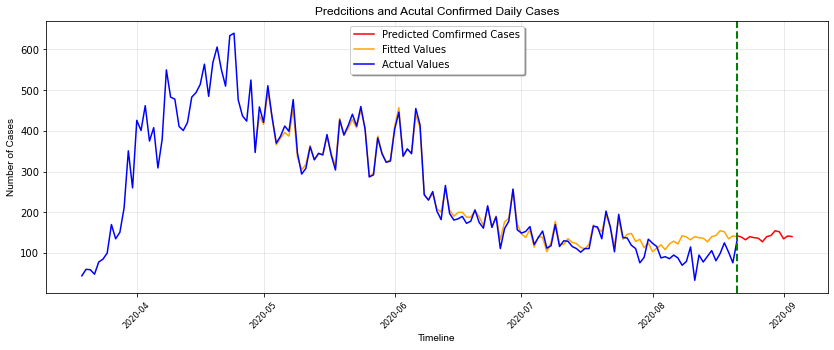

In [158]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2020-03-19'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Cases'], color='r', label='Predicted Comfirmed Cases')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Cases'], color='orange', label='Fitted Values')
plt.plot(DATASET_TRAIN, color='b', label='Actual Values')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Confirmed Daily Cases', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Number of Cases', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()